# **Exercise 8:**
## *You are going to work on the [Supermarket dataset](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023) for predictive marketing . Your task is to use clustering algorithms to segment the customers into distinct groups based on their shopping behavior and demographics.*

### *Explore and preprocess the dataset. This may involve handling categorical variables and normalizing or scaling numerical features and feature engineering.*

<br />

Note:


**Only the code for generating the graphs will be listed here. The graphs themselves will be interpreted in the "main" report file.**

In [1]:
# Import initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load dataset
raw_df = pd.read_csv('./data/ECommerce_consumer behaviour.csv')
raw_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
# Make copy of original data frame
df = raw_df.copy()
df.shape

(2019501, 12)

### EDA

#### Average number of orders per user

In [4]:
n_users = 200 # Number of users we'll plot, given that there's too much data to plot all of it
unique_users = df['user_id'].unique()[:n_users]

max_order_df = pd.DataFrame({'user_id': unique_users, 'max_order': np.zeros_like(unique_users)})
max_order_df.head()

,user_id,max_order
0,49125,0
1,162867,0
2,147243,0
3,195275,0
4,58222,0


In [5]:
for index, row in max_order_df.iterrows():
    user_data = df[df.user_id == row.user_id]
    max_order = max(user_data.order_number)
    max_order_df.iloc[index]['max_order'] = max_order

In [6]:
max_order_df.head()

,user_id,max_order
0,49125,36
1,162867,20
2,147243,38
3,195275,90
4,58222,3


[[Text(-50000.0, 0, ''),
  Text(0.0, 0, ''),
  Text(50000.0, 0, ''),
  Text(100000.0, 0, ''),
  Text(150000.0, 0, ''),
  Text(200000.0, 0, ''),
  Text(250000.0, 0, '')]]

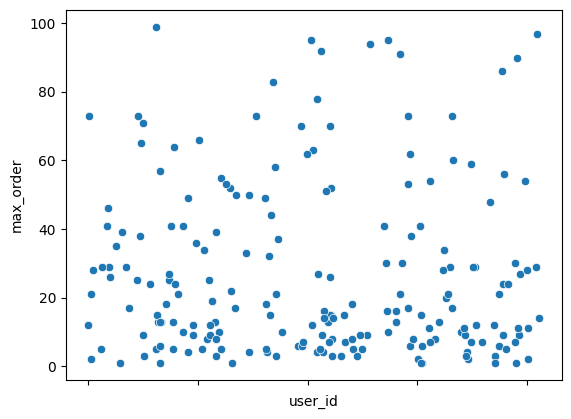

In [7]:
sns.scatterplot(data=max_order_df, x="user_id", y="max_order").set(xticklabels=[])

#### Frequency for time of day

For this, we'll look at the `order_hour_of_day` column.

In [8]:
unique_hour = df['order_hour_of_day'].unique()
unique_hour.sort()

n_orders = []

# Iterate over every possible hour, then calculate how many entries there are for each row.
for hour in unique_hour:
    n_orders.append(df.loc[df.order_hour_of_day == hour].shape[0])

<Axes: >

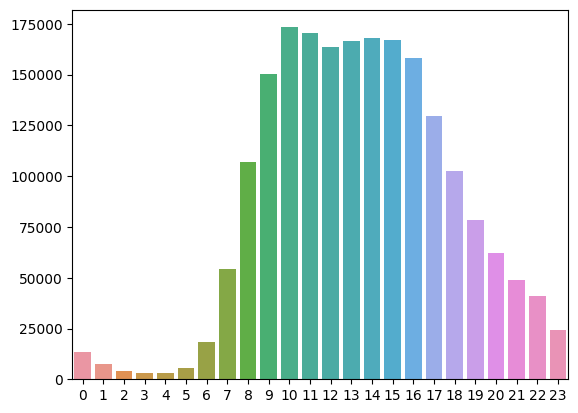

In [9]:
# Create barplot
sns.barplot(x=unique_hour, y=n_orders)

#### Frequency for day of week

For this, we'll look at the `order_dow` column.

In [10]:
unique_day = df['order_dow'].unique()
unique_day.sort()

n_orders = []

# Iterate over every possible hour, then calculate how many entries there are for each row.
for day in unique_day:
    n_orders.append(df.loc[df.order_dow == day].shape[0])

[[Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')]]

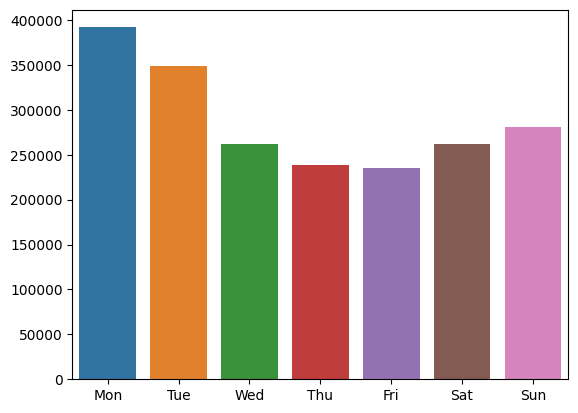

In [11]:
# Create barplot
sns.barplot(x=unique_day, y=n_orders).set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

#### Most popular department

In [12]:
unique_dept = df['department'].unique()

n_orders = []

# Iterate over every possible hour, then calculate how many entries there are for each row.
for dept in unique_dept:
    n_orders.append(df.loc[df.department == dept].shape[0])

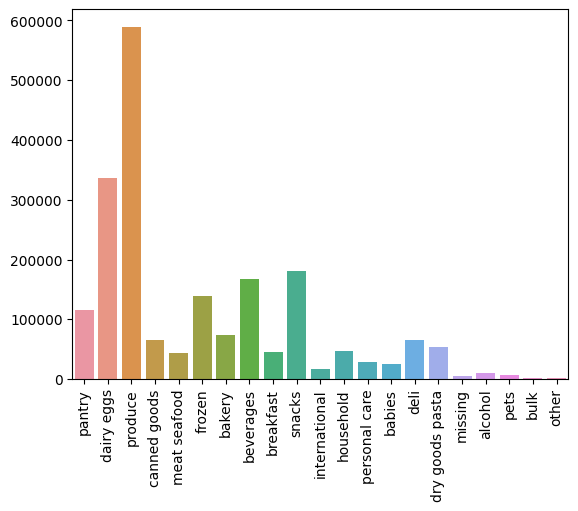

In [13]:
# Create barplot
sns.barplot(x=unique_dept, y=n_orders).tick_params(axis='x', rotation=90)

### Data Pre-Processing

In preparation for the next few sub-sections of this exercise, some data pre-processing needs to be done before moving on.

#### Handling `NaN` Data

First thing we'll do is checking for `NaN` data;

In [14]:
# Checking for NaN data per each column:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

As shown above, the only column with `NaN` values is `days_since_prior_order`. As this column describes the number of days since the customer's last order, a value of `NaN` implies that the customer has not ordered before. I'll fill in these values with `-1`.

In [15]:
# Fill NaN values with -1.
df = df.fillna(-1)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1.0,83,5,0,4,produce,fresh vegetables


#### Removing Irrelevant Columns

There are also a couple of columns that most likely do not play a vital role in our potential machine learning model's performance, such as `order_id` and `user_id`. In the next step, we'll drop these columns:

In [16]:
df = df.drop(['order_id', 'user_id'], axis=1)

However, there's also another column `product_name`, which is not needed given that a `product_id` column already exists. 

> One could perform advanced feature engineering by looking for keywords in the product name, however, that is beyond the scope of this question.

In [17]:
df = df.drop(['product_name'], axis=1)

In [18]:
df.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department
0,1,2,18,-1.0,17,1,0,13,pantry
1,1,2,18,-1.0,91,2,0,16,dairy eggs
2,1,2,18,-1.0,36,3,0,16,dairy eggs
3,1,2,18,-1.0,83,4,0,4,produce
4,1,2,18,-1.0,83,5,0,4,produce


#### Converting Categorical Columns

A quick peack at the data tells us that there is a categorical column that need conversion; `department`. Similar to the coding exercise in the last assignment, it's easy to convert these values into digits using Pandas' categorical class so we could use these columns in a machine learning model.

In [19]:
# Convert the department column into categorical codes (i.e. digits).
department_categorical = pd.Categorical(df['department'])
df['department'] = department_categorical.codes

In [20]:
# I'll save the final form of the data
df.to_csv("./data/preprocessed_data.csv", index=None)

In [21]:
# Loading the data again 
df = pd.read_csv("./data/preprocessed_data.csv")

# Preview preprocessed dataframe
df.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department
0,1,2,18,-1.0,17,1,0,13,16
1,1,2,18,-1.0,91,2,0,16,7
2,1,2,18,-1.0,36,3,0,16,7
3,1,2,18,-1.0,83,4,0,4,19
4,1,2,18,-1.0,83,5,0,4,19


Now that our data has been preprocessed, we can move onto the next part of this exercise.

### *Use K-means clustering to identify the optimal number of clusters. Experiment with different values of K and use metrics such as the elbow method and silhouette score to evaluate the performance of the clustering.*

For implementing the algorithm, [Scikit-Learn's implementation of K-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) was used.

The elbow method is a method for finding the best number of clusters by calculating the WCSS (within-cluster sum of square) for each cluster. The lesser our WCSS is for a specific value of k, the better. 

When we increase our k, the WCSS will decrease dramatically at first before each increase in k has very little effect on our WCSS. The point at which the improvement slows down dramatically is known as the *elbow* and can be considered to be the point at where the balance between computational power required to compute each cluster and the number of clusters is optimal.

In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

n_clusters = [i for i in range(2, 16)]
wcss = []

for n_cluster in n_clusters:
    print(f"N clusters: {n_cluster}/15")
    kmeans = KMeans(n_clusters=n_cluster, random_state=33, n_init='auto').fit(df)
    # We can obtain kmeans from the inertia_ parameter
    wcss.append(kmeans.inertia_)

N clusters: 2/15
N clusters: 3/15
N clusters: 4/15
N clusters: 5/15
N clusters: 6/15
N clusters: 7/15
N clusters: 8/15
N clusters: 9/15
N clusters: 10/15
N clusters: 11/15
N clusters: 12/15
N clusters: 13/15
N clusters: 14/15
N clusters: 15/15


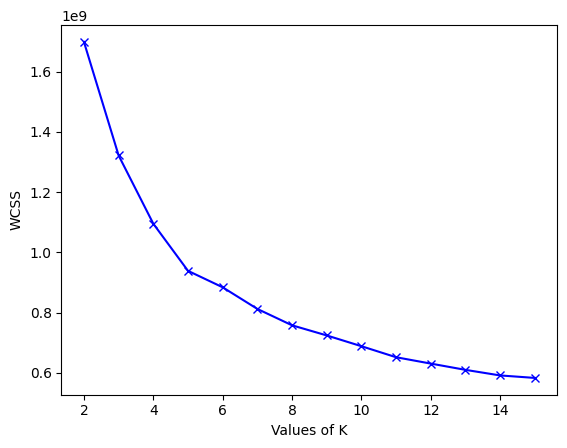

In [23]:
# Plot distortions
plt.plot(n_clusters, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

From the graph above, we can assume `k=8` is a good value.

Another method mentioned in the exercise is *silhouette score*. To obtain this value, we'll be using [Scikit-Learn's implementation of this function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

We can repeat the previous calculations, just with silhouette score instead of WCSS;

N clusters: 2/15
N clusters: 3/15
N clusters: 4/15
N clusters: 5/15
N clusters: 6/15
N clusters: 7/15
N clusters: 8/15
N clusters: 9/15
N clusters: 10/15
N clusters: 11/15
N clusters: 12/15
N clusters: 13/15
N clusters: 14/15
N clusters: 15/15


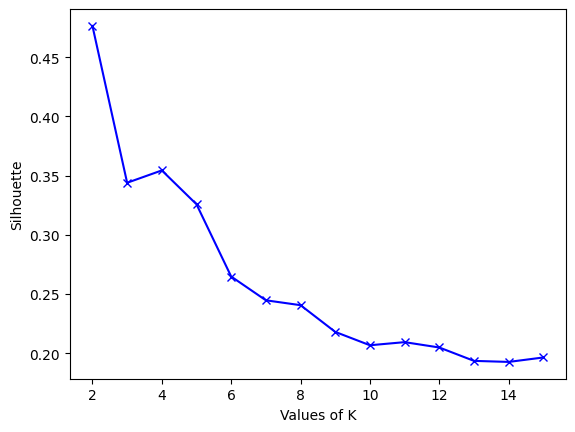

In [24]:
from sklearn.metrics import silhouette_score

n_clusters = [i for i in range(2, 16)]
scores = []

for n_cluster in n_clusters:
    print(f"N clusters: {n_cluster}/15")
    kmeans = KMeans(n_clusters=n_cluster, random_state=33, n_init='auto')
    preds = kmeans.fit_predict(df)
    scores.append(silhouette_score(df[:10000], preds[:10000], n_jobs=-1))   
    # ^ Not using all the points because that takes up too much time and computational complexity

plt.plot(n_clusters, scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.show()

Judging by the graph above, the most optimal value for `k` is most likely 13, as when `k=13`, the silhouette score is at it's lowest before in begins to increase again.

### *Visualize the clusters and analyze their characteristics. This may involve plotting the clusters in 2D or 3D using PCA or t-SNE.*

#### Dimensionality reduction with PCA

For each number of k, we can reduce the number of features down to 2 for easy visualization, and then iterating over different values of k (from 2 to 10) to find the best (i.e. most well separated clusters).

First thing we'll do is transform our dataset down to 2 dimensions:

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

In [26]:
df_2d[:5]

array([[ 54.29756938, -13.87844755],
       [-20.00258482, -13.89235615],
       [ 34.95851283, -13.91271088],
       [-11.46067063, -13.8556135 ],
       [-11.4622365 , -13.85779972]])

Next, I'll create a *grid* of plots each illustrating the different clusters for different numbers of clusters. As previously mentioned, we'll iterate between 2 and 10 clusters.

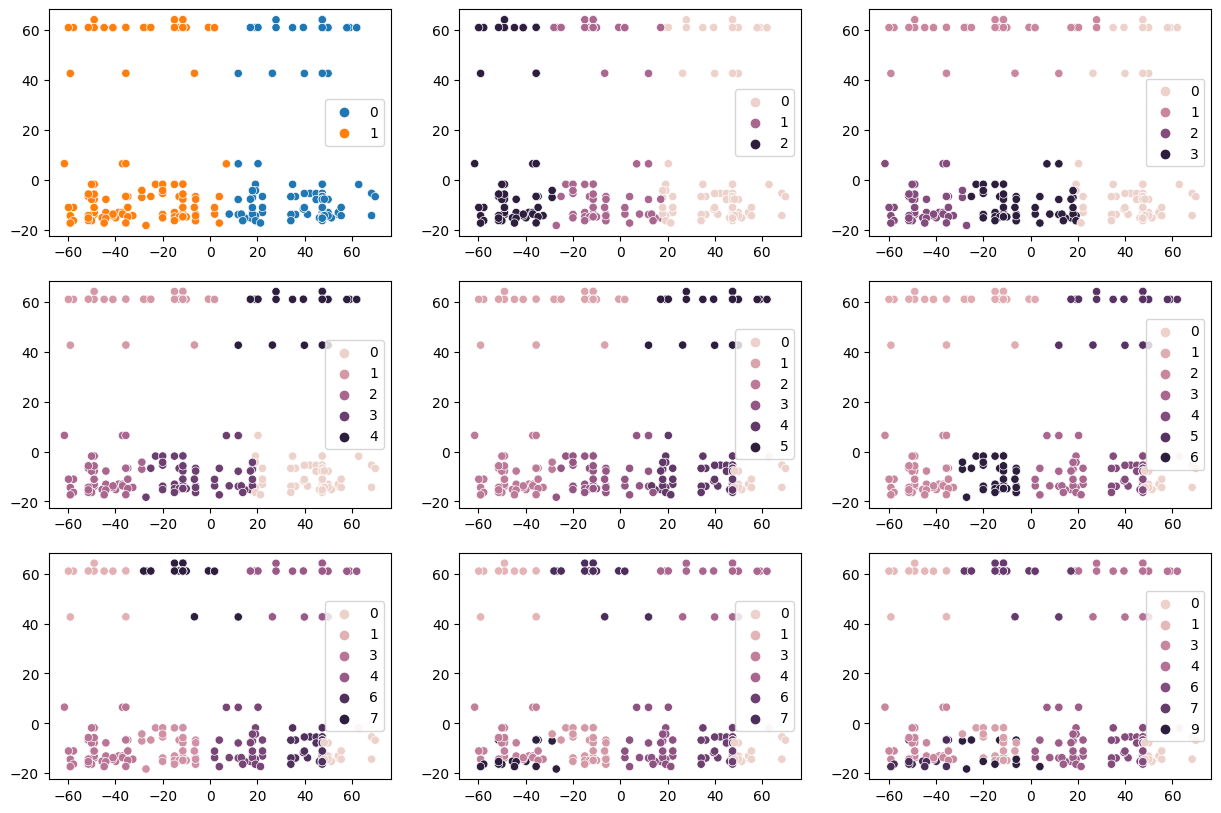

In [27]:
n_samples_to_plot = 250
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i in range(2, 11):
    row = (i-2)%3
    col = (i-2)//3
    kmeans = KMeans(n_clusters=i, random_state=33, n_init='auto')
    preds = kmeans.fit_predict(df)
    
    sub_data = df_2d[:n_samples_to_plot]
    sub_pred = preds[:n_samples_to_plot]
    
    sns.scatterplot(x = sub_data[:,0], y = sub_data[:, 1], hue= sub_pred, ax=axs[col, row])

### *Experiment with other clustering algorithms such as DBSCAN or hierarchical clustering, and compare their performance with K-means.*

For this, I'll use the best results from the previous subsection (K-means with 8 clusters and use that as a benchmark. Then, I'll list the results in a table, using silhouette score as our metric.


In [28]:
from tabulate import tabulate

results = []

kmeans = kmeans = KMeans(n_clusters=8, random_state=33, n_init='auto')
preds = kmeans.fit_predict(df)
score = silhouette_score(df[:10000], preds[:10000], n_jobs=-1)

results.append(('KMeans', score))

For hierarchical clustering, I'll use Scikit-Learn's implementation documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

In [29]:
from sklearn.cluster import AgglomerativeClustering

n_points = 10000    # This algorithm can't allocate all the memory needed for the entire dataframe

h_cluster = AgglomerativeClustering(n_clusters=5)
preds = h_cluster.fit_predict(df[:n_points])
score = silhouette_score(df[:n_points], preds[:n_points], n_jobs=-1)

results.append(('H Clustering', score))

For DBScan, I'll also be using Scikit-Learn's implementation documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2)
preds = dbscan.fit_predict(df[:n_points])
score = silhouette_score(df[:n_points], preds[:n_points], n_jobs=-1)

results.append(('DBScan', score))

The results are as follows:

In [31]:
print(tabulate(set(results), headers=['Model Name', 'Score'], tablefmt="fancy_grid"))

╒══════════════╤═══════════╕
│ Model Name   │     Score │
╞══════════════╪═══════════╡
│ H Clustering │  0.323507 │
├──────────────┼───────────┤
│ KMeans       │  0.240621 │
├──────────────┼───────────┤
│ DBScan       │ -0.25176  │
╘══════════════╧═══════════╛


### \**Try to reduce data dimensionality using PCA before training your model, use different numbers of components and report their effects.*

By checking the shape of our preprocessed dataframe, we can check and see how many features we have to work with:

In [ ]:
df.shape

Therefore, the number of features we *can* possibly have using PCA is 1 to 8. 

The method I'll be iterating over each possible sequence of transformed features, and then over the possible number of clusters (2 to 15), picking the k with the lowest silhouette score as that specific decomposition's "score". Then, out of all the possible decompositions, I'll pick the best one.

> While not very computationally efficient, given that k-means and PCA are relatively fast algorithms and the cost is bearable.

In [ ]:
best_scores = []
best_n_cluster = []
n_features = [i for i in range(1, 9)]

for i in n_features:
    print(f"N features: {i}")
    
    # Transform features
    pca = PCA(n_components=i)
    new_df = pca.fit_transform(df)
    
    # Iterate over possible number of clusters
    best_silhouette = np.inf
    best_cluster = -1
    
    for n_cluster in range(2, 16):
        print(f"N clusters: {n_cluster}/15")
        kmeans = KMeans(n_clusters=n_cluster, random_state=33, n_init='auto')
        preds = kmeans.fit_predict(new_df)
        score = silhouette_score(new_df[:10000], preds[:10000], n_jobs=-1)
        
        # Find best possible score
        if score < best_silhouette:
            best_silhouette = score
            best_cluster = n_cluster
    
    # Log results
    best_scores.append(best_silhouette)
    best_n_cluster.append(best_cluster)
    
    print("*"*10)

In [ ]:
# Best cluster:
best_idx = np.argmin(best_scores)
print(f"The best performing cluster had {n_features[best_idx]} features with {best_n_cluster[best_idx]} clusters")

Next, I'll plot the results so we'll be able to see the results better:

In [ ]:
plt.plot(n_features, best_scores, 'bx-')
plt.xlabel('Number of Features')
plt.ylabel('Silhouette')
plt.show()

However, taking the elbow graph into account, a good balance might be better best to use 5 features.

In [ ]:
print(f"Most balanced choice has 5 features with {best_n_cluster[4]} clusters")